In [2]:
import torch
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

decoy_data_path = "../eval_data/model_1_val_decoy_scores.pt"
decoy_data_path_2 = None # For ensemble analysis

decoy_data = torch.load(decoy_data_path, weights_only=False, map_location="cpu")

if decoy_data_path_2 is not None:
    decoy_data2 = torch.load(decoy_data_path2, weights_only=False, map_location="cpu")
else:
    decoy_data2 = decoy_data




In [3]:
import numpy as np

summary = {}
all_spearmans = {}
all_tms = {}
rosetta_spearmans = {}
rg_spearmans = {}
rgs = {}
all_top1s = {}
rosetta_top1s = {}
rg_top1s = {}


for pdb in decoy_data.keys():
    print(pdb)
    decoys = torch.load(f"../eval_data/decoys/{pdb}.pt", weights_only=False)

    spearmans = []
    top1s = []
    for i,(nrg1, nrg2) in enumerate(zip(decoy_data[pdb], decoy_data2[pdb])):

        t = i/20
        nrg = nrg1 + nrg2 
            
        spearmans.append(spearmanr(nrg.squeeze().numpy(), -decoys['tmscore'].numpy())[0])
        
        top1s.append(decoys['tmscore'][nrg.argmin()])

    rg = torch.sqrt((decoys['atom37'][...,:3,:].reshape([decoys['atom37'].shape[0], -1, 3]) - decoys['atom37'][...,:3,:].reshape([decoys['atom37'].shape[0], -1, 3]).mean(dim=-2, keepdim=True)).pow(2).sum(dim=-1).mean(dim=-1))
    rgs[pdb] = rg
    rg_spearmans[pdb] = spearmanr(rg, -decoys['tmscore'].numpy())[0]
    rosetta_spearmans[pdb] = spearmanr(decoys['rosetta'].numpy(), -decoys['tmscore'].numpy())[0]

    rosetta_top1s[pdb] = decoys['tmscore'][decoys['rosetta'].argmin()]
    rg_top1s[pdb] = decoys['tmscore'][rg.argmin()]


    all_tms[pdb] = decoys['tmscore']
    all_spearmans[pdb] = spearmans
    all_top1s[pdb] = top1s

    
    eval_idx = 2 
    print(spearmans[eval_idx])
    print(rosetta_spearmans[pdb])
    print(rg_spearmans[pdb])

    summary[pdb] = spearmans[eval_idx]

1cc8
0.8906005189169797
0.8777432547529791
0.8087005195950409
2fwh
0.8243263234814862
0.8359517119787782
0.716923439547325
1bk2
0.9003546011014809
0.8612792729358211
0.9263623786555665
2pcy
0.9147863978149543
0.886587563258325
0.7121660258811779
1tsf
0.7429815705799043
0.5535971893127953
0.7905495211251468
2z0t
0.9092155983753456
0.8884457583034475
0.8562996506153857
2v1m
0.8454682974487615
0.6000695160313674
0.8841878395212412
1luz
0.8208503043114054
0.7686297041003798
0.8307406127487578
2acy
0.9079153861698229
0.9337608615459894
0.7041614384132912
2chf
0.8957617353143693
0.7488037248010012
0.6802906134201555
1nps
0.9014823975463921
0.8818599461380104
0.8684194934399493
1x6x
0.7125377694643921
0.7288771419747988
0.3208141623729865
2he4
0.9137289120453983
0.836520540875002
0.7318235028104386
2cxd
0.827089176539751
0.8728054662294926
0.808098462302521
1row
0.9152066038823186
0.8497958948382547
0.2570293080011123
1lis
0.4003555986660926
0.4369882123814895
0.015393824417089093
2y72
0.8967

Text(0.5, 1.0, 'Target=1kf5, Noise Level=0.1')

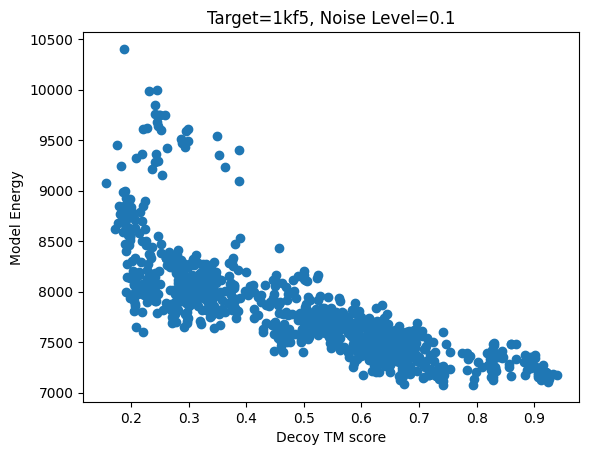

In [4]:
pdb = '1kf5'
level = 2 #change to see differnet noise levels
decoys = torch.load(f"../eval_data/decoys/{pdb}.pt", weights_only=False)


plt.scatter(decoys['tmscore'].numpy(), decoy_data[pdb][level] + decoy_data2[pdb][level])

plt.xlabel("Decoy TM score")
plt.ylabel("Model Energy")
plt.title(f"Target={pdb}, Noise Level={(level)/(decoy_data[pdb].shape[0]-1)}")


torch.Size([66, 21])


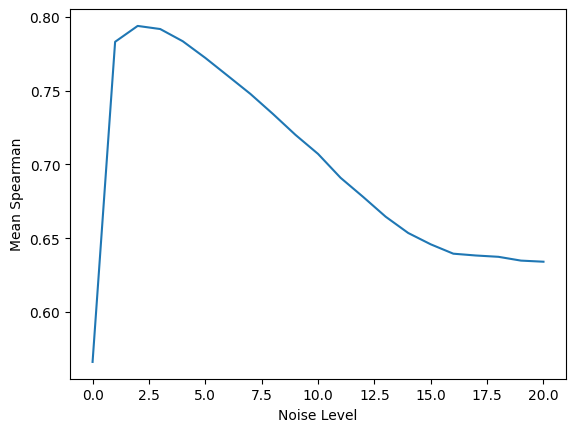

In [5]:
spearman_tensor = torch.stack([torch.tensor(all_spearmans[k]) for k in all_spearmans.keys()])
print(spearman_tensor.shape)
plt.xlabel("Noise Level")
plt.ylabel("Mean Spearman")
plt.plot(spearman_tensor.mean(dim=0).numpy())

In [7]:
print(spearman_tensor.mean(dim=0).max())
print(spearman_tensor.mean(dim=0).argmax())
print(np.array([v for k,v in rosetta_spearmans.items()]).mean())

tensor(0.7940, dtype=torch.float64)
tensor(2)
0.7612950610540264


tensor(0.8501)
tensor(4)


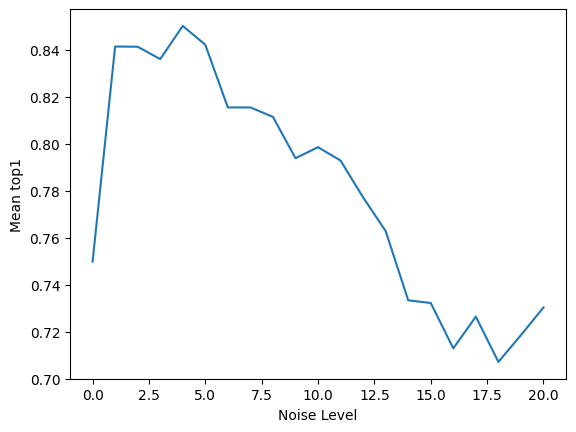

In [8]:
top1_tensor = torch.stack([torch.tensor(all_top1s[k]) for k in all_top1s.keys()])
plt.xlabel("Noise Level")
plt.ylabel("Mean top1")
plt.plot(top1_tensor.mean(dim=0).numpy())
print(top1_tensor.mean(dim=0).max())
print(top1_tensor.mean(dim=0).argmax())

In [9]:
print(torch.tensor([x for x in rosetta_top1s.values()]).mean())
print(torch.tensor([x for x in rg_top1s.values()]).mean())

tensor(0.9034)
tensor(0.6971)
